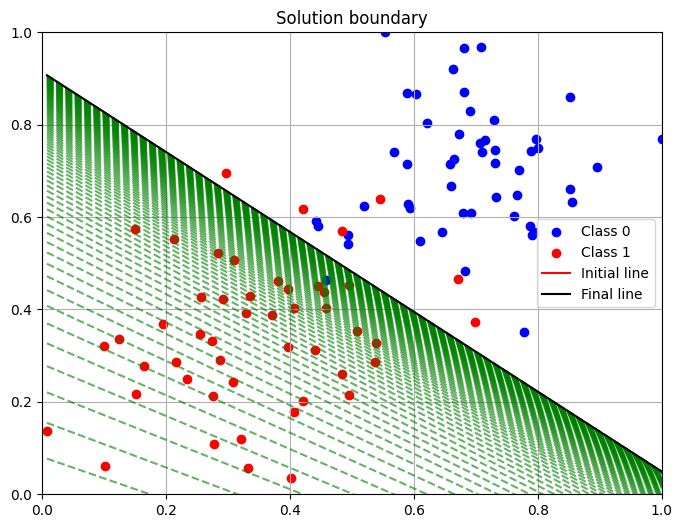

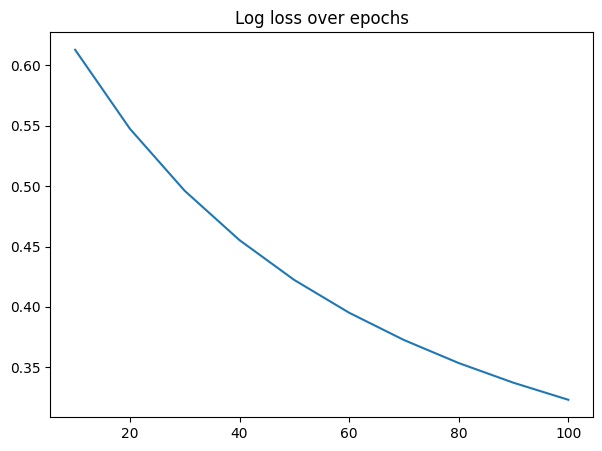

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data ---------------------------------------------------------------
data = pd.read_csv("data.csv", header=None)
data.columns = ['x1', 'x2', 'label']

X = data[['x1', 'x2']].values
y = data['label'].values

# sigmoid -----------------------------------------------------------------
def sigmoid(z):
	return 1 / (1 + np.exp(-z))

# log loss ----------------------------------------------------------------
def calc_log_loss(y_true, y_pred):
	eps = 1e-10
	y_pred = np.clip(y_pred, eps, 1 - eps)
	return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))


# plot decision -----------------------------------------------------------
def plot(w, b, iteration, final=False):
	x_points = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
	y_vals = -(w[0] * x_points + b) / w[1]

	if iteration == 0:
		plt.plot(x_points, y_vals, 'r-', label='Initial line')
	elif final:
		plt.plot(x_points, y_vals, 'k-', label='Final line')
	else:
		plt.plot(x_points, y_vals, 'g--', alpha=0.6)

# perceptron --------------------------------------------------------------
def perceptron(X, y, r, epochs):
	w = np.random.uniform(-0.5, 0.5, size=2)
	b = np.random.uniform(-0.5, 0.5)

	plt.figure(figsize=(8, 6))
	for label, color in zip([0, 1], ['blue', 'red']):
		plt.scatter(X[y==label][:, 0], X[y==label][:, 1], label=f'Class {label}', c=color)
	
	plot(w, b, 0)

	log_losses = []

	for epoch in range(1, epochs+1):
		y_preds = []

		for i in range(len(X)):
			x_i = X[i]
			target = y[i]
			
			z = np.dot(w, x_i) + b
			y_hat = sigmoid(z)
			error = target - y_hat

			w += r * error * x_i
			b += r * error
			y_preds.append(y_hat)

		if epoch % 10 == 0:
			log_loss = calc_log_loss(y, np.array(y_preds))
			log_losses.append((epoch, log_loss))

		plot(w, b, epoch)

	plot(w, b, epochs+1, final=True)
	plt.legend()
	plt.title('Solution boundary')
	plt.grid(True)
	plt.xlim(0, 1)
	plt.ylim(0, 1)
	plt.show()

	if log_losses:
		epochs, losses = zip(*log_losses)
		plt.figure(figsize=(7, 5))
		plt.plot(epochs, losses, linestyle='-')
		plt.title("Log loss over epochs")
		#plt.xlim(0, 100)
		#plt.ylim(0, 1)
		plt.show()

# running -----------------------------------------------------------------
perceptron(X, y, 0.01, 100)